# Risk Management Project

### 1. Import Data from yfinance

In [3]:
import functions as f
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [4]:
tickers = ['JNJ', 'XOM', 'TLT', 'GLD', 'AAPL']
start_date = "2018-01-01"
end_date = "2023-01-01"

# Download adjusted close prices from Yahoo Finance for a 5-year range
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  5 of 5 completed


In [5]:
missing_data = data.isnull().sum()
print("Missing values per ticker:\n", missing_data)

Missing values per ticker:
 Ticker
AAPL    0
GLD     0
JNJ     0
TLT     0
XOM     0
dtype: int64


In [6]:
portfolio_weights = np.array([0.25,  0.20, 0.25,  0.15, 0.15])
risk_free_ratio = 0.05

In [7]:
data

Ticker,AAPL,GLD,JNJ,TLT,XOM
Date,,,,,
2018-01-02 00:00:00+00:00,40.524349,125.150002,115.682434,106.164879,61.637543
2018-01-03 00:00:00+00:00,40.517273,124.820000,116.787491,106.672485,62.848110
2018-01-04 00:00:00+00:00,40.705482,125.459999,116.779175,106.655540,62.935104
2018-01-05 00:00:00+00:00,41.168934,125.330002,117.742996,106.351006,62.884357
2018-01-08 00:00:00+00:00,41.016033,125.309998,117.892563,106.283325,63.167084
...,...,...,...,...,...
2022-12-23 00:00:00+00:00,130.487793,167.259995,168.306671,95.841949,102.460426
2022-12-27 00:00:00+00:00,128.676834,168.669998,168.259232,93.946854,103.884010
2022-12-28 00:00:00+00:00,124.728371,167.910004,167.529053,93.393356,102.177597


### 2. Calculate Portfolio Returns and Covariance Matrix

In [9]:
daily_returns = data.pct_change().dropna()
daily_returns

Ticker,AAPL,GLD,JNJ,TLT,XOM
Date,,,,,
2018-01-03 00:00:00+00:00,-0.000175,-0.002637,0.009553,0.004781,0.019640
2018-01-04 00:00:00+00:00,0.004645,0.005127,-0.000071,-0.000159,0.001384
2018-01-05 00:00:00+00:00,0.011385,-0.001036,0.008253,-0.002855,-0.000806
2018-01-08 00:00:00+00:00,-0.003714,-0.000160,0.001270,-0.000636,0.004496
2018-01-09 00:00:00+00:00,-0.000115,-0.004628,0.015857,-0.013373,-0.004246
...,...,...,...,...,...
2022-12-23 00:00:00+00:00,-0.002798,0.002998,0.002542,-0.014660,0.026445
2022-12-27 00:00:00+00:00,-0.013878,0.008430,-0.000282,-0.019773,0.013894
2022-12-28 00:00:00+00:00,-0.030685,-0.004506,-0.004340,-0.005892,-0.016426


In [10]:
portfolio_rets = f.portfolio_return(portfolio_weights, daily_returns.T)
portfolio_rets

Date
2018-01-03 00:00:00+00:00    0.005480
2018-01-04 00:00:00+00:00    0.002353
2018-01-05 00:00:00+00:00    0.004153
2018-01-08 00:00:00+00:00   -0.000064
2018-01-09 00:00:00+00:00    0.000367
                               ...   
2022-12-23 00:00:00+00:00    0.002303
2022-12-27 00:00:00+00:00   -0.002736
2022-12-28 00:00:00+00:00   -0.013005
2022-12-29 00:00:00+00:00    0.012312
2022-12-30 00:00:00+00:00    0.000114
Length: 1258, dtype: float64

In [11]:
correlation_matrix = daily_returns.corr()
covariance_matrix = daily_returns.cov()

In [12]:
covariance_matrix

Ticker,AAPL,GLD,JNJ,TLT,XOM
Ticker,,,,,
AAPL,0.000445,0.000016,0.000116,-0.000037,0.000156
GLD,0.000016,0.000082,0.000005,0.000026,0.000013
JNJ,0.000116,0.000005,0.000173,-0.000029,0.000095
TLT,-0.000037,0.000026,-0.000029,0.000103,-0.000066
XOM,0.000156,0.000013,0.000095,-0.000066,0.000455


In [13]:
portfolio_volatility = f.portfolio_vol(portfolio_weights, covariance_matrix)

In [14]:
portfolio_volatility

0.009181508998602749

### 3. VaR Calculation

#### a. Historical VaR

In [17]:
var_historic = f.var_historic(portfolio_rets, level=5)
var_historic

0.013887333096252246

#### b. Gaussian VaR

In [19]:
var_gaussian = f.var_gaussian(portfolio_rets, level=5, modified=False)
var_gaussian

0.014570325114383517

#### c. Cornish-Fisher VaR

In [21]:
skewness = f.skewness(portfolio_rets)
kurtosis = f.kurtosis(portfolio_rets)

In [22]:
skewness

-0.16098667355541477

In [23]:
kurtosis

10.213905045413654

In [24]:
var_cornish_fisher = f.var_gaussian(portfolio_rets, level=5, modified=True)
var_cornish_fisher

0.01364972025299694

### 4. CVaR Calculation

#### a. Historical CVaR  

In [27]:
cvar_historic = f.cvar_historic(portfolio_rets, level=5)
cvar_historic

0.021733807533968884

#### b. Gaussian CVaR

In [29]:
cvar_gaussian = f.cvar_gaussian(portfolio_rets, level=5, modified=False)
cvar_gaussian

-0.0015222931350765577

### 5. Maximum Drawdown (MDD)

In [37]:
drawdowns = f.drawdown(portfolio_rets, start=100)
max_drawdown = drawdowns.min()

In [38]:
max_drawdown

Wealth       91.403776
Peaks       100.548031
Drawdown     -0.210893
dtype: float64

In [41]:
wealth_index = f.compound_returns(portfolio_rets, start=100)

In [43]:
running_max = wealth_index.cummax()

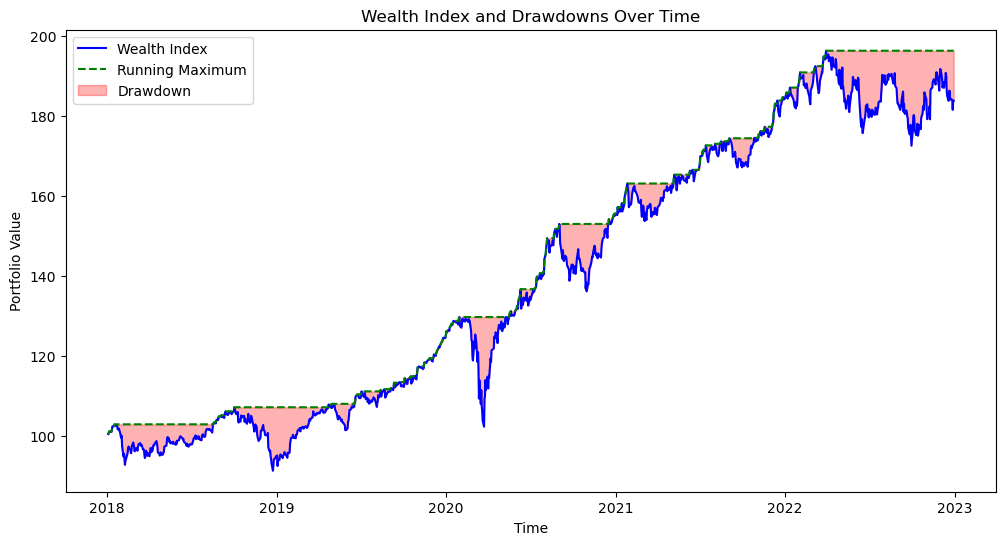

In [47]:
plt.figure(figsize=(12, 6))

plt.plot(wealth_index, label="Wealth Index", color="blue")
plt.plot(running_max, label="Running Maximum", linestyle="--", color="green")
plt.fill_between(drawdowns.index, wealth_index, running_max, color="red", alpha=0.3, label="Drawdown")


plt.title("Wealth Index and Drawdowns Over Time")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.legend()
plt.show()